# BME296 Final Project: *M. tuberculosis* pcaA Gene
This Notebook will contain an analysis of mycolic acid synthase, an enzyme represented by the pcaA gene in *Mycobacterium tuberculosis*.

In [39]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [40]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import cobra as cb

from Bio.PDB import *
import nglview as nv
import ipywidgets

from tabulate import tabulate

## 1. Molecular Scale
In this section of the Notebook, the protein's structure will be evaluated using information provided in the AlphaFold database.

In [41]:
pdb_parser = PDBParser()
structure = pdb_parser.get_structure("P", "Protein_Structure.pdb")
view = nv.show_biopython(structure)
view

NGLWidget()

## 2. Cellular Scale
This section of the Notebook will explore the protein on the cellular level, primarily through flux balance analysis.

### *M. tuberculosis* Metabolic Model

In [42]:
# load model
model = cb.io.read_sbml_model('iEK1008.xml')

In [43]:
# display model information
model

Name,iEK1008
Memory address,7fcc013857b0
Number of metabolites,998
Number of reactions,1226
Number of genes,1008
Number of groups,0
Objective expression,1.0*BIOMASS__2 - 1.0*BIOMASS__2_reverse_ecbec
Compartments,"cytosol, extracellular space"


In [61]:
# define the environment

# export all metabolites, import no metabolites
for ex in model.exchanges:
    ex.lower_bound = 0
    ex.upper_bound = 1000

In [62]:
# metabolite exchanges
met_ex = ['EX_ala_B_e','EX_ala__D_e','EX_ala__L_e', 'EX_asn__L_e','EX_asp__L_e','EX_ca2_e','EX_cl_e','EX_fe2_e','EX_fe3_e',
          'EX_gal_e','EX_gln__L_e','EX_glu__L_e','EX_gly_e','EX_h_e','EX_h2o_e','EX_his__L_e','EX_ile__L_e','EX_k_e',
          'EX_leu__L_e','EX_lys__L_e','EX_met__L_e','EX_mg2_e','EX_na1_e','EX_nh4_e','EX_o2_e','EX_phe__L_e','EX_pi_e',
          'EX_ser__D_e','EX_ser__L_e','EX_so4_e','EX_thr__L_e','EX_tyr__L_e','EX_val__L_e']

# unlimited import of each metabolite
for ex_id in met_ex:
    model.exchanges.get_by_id(ex_id).lower_bound = -1000
    print(model.exchanges.get_by_id(ex_id).id, model.exchanges.get_by_id(ex_id).name)
    


EX_ala_B_e Beta-Alanine exchange
EX_ala__D_e D-Alanine exchange
EX_ala__L_e L-Alanine exchange
EX_asn__L_e L-Asparagine exchange
EX_asp__L_e L-Aspartate exchange
EX_ca2_e Calcium exchange
EX_cl_e Chloride exchange
EX_fe2_e Fe2+ exchange
EX_fe3_e Fe3+ exchange
EX_gal_e D-Galactose exchange
EX_gln__L_e L-Glutamine exchange
EX_glu__L_e L-Glutamate exchange
EX_gly_e Glycine exchange
EX_h_e H+ exchange
EX_h2o_e H2O exchange
EX_his__L_e L-Histidine exchange
EX_ile__L_e L-Isoleucine exchange
EX_k_e K+ exchange
EX_leu__L_e L-Leucine exchange
EX_lys__L_e L-Lysine exchange
EX_met__L_e L-Methionine exchange
EX_mg2_e Mg exchange
EX_na1_e Sodium exchange
EX_nh4_e Ammonia exchange
EX_o2_e O2 exchange
EX_phe__L_e L-Phenylalanine exchange
EX_pi_e Phosphate exchange
EX_ser__D_e D-Serine exchange
EX_ser__L_e L-Serine exchange
EX_so4_e Sulfate exchange
EX_thr__L_e L-Threonine exchange
EX_tyr__L_e L-Tyrosine exchange
EX_val__L_e L-Valine exchange


In [72]:
# base optimal value:
base_solution = model.optimize()

# create table
table = [['Metabolite Exchange', 'Removed']]

for ex_id in met_ex:
    temp_array = [model.exchanges.get_by_id(ex_id).name]
    
    try:
        # export
        model.exchanges.get_by_id(ex_id).lower_bound = 0
        solution = model.optimize()
        temp_array.append(solution.objective_value)
    except:
        # error is thrown
        temp_array.append(0.0)
    
    # reset values to -1000
    model.exchanges.get_by_id(ex_id).lower_bound = -1000
    solution = model.optimize()
    
    # add tempArray to main array
    table.append(temp_array)
    

# tabulate!
print("Base Optimal Solution: ", base_solution.objective_value)
print(tabulate(table, headers='firstrow'))

Base Optimal Solution:  29.299628571552145
Metabolite Exchange            Removed
------------------------  ------------
Beta-Alanine exchange     29.2996
D-Alanine exchange        29.2996
L-Alanine exchange        29.2996
L-Asparagine exchange     29.2505
L-Aspartate exchange      29.2996
Calcium exchange          29.2996
Chloride exchange         29.2996
Fe2+ exchange             29.2996
Fe3+ exchange             -9.29634e-15
D-Galactose exchange      20.0027
L-Glutamine exchange      29.2996
L-Glutamate exchange      28.0195
Glycine exchange          29.2996
H+ exchange               29.2996
H2O exchange              29.2996
L-Histidine exchange      29.0992
L-Isoleucine exchange     29.2996
K+ exchange               29.2996
L-Leucine exchange        29.2996
L-Lysine exchange         29.2455
L-Methionine exchange     29.2128
Mg exchange               29.2996
Sodium exchange           29.2996
Ammonia exchange          29.2996
O2 exchange                2.09622e-13
L-Phenylalanine exc

In [75]:
# reimport of each metabolite
for ex_id in met_ex:
    model.exchanges.get_by_id(ex_id).lower_bound = -1000
solution = model.optimize()

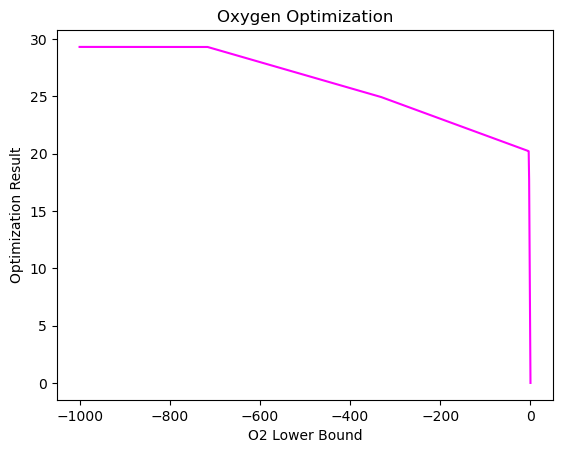

In [67]:
# x axis values
x = np.linspace(-1000, 0, 1001)
# corresponding y axis values
y = []
for xVar in x:
    try: 
        # export
        model.exchanges.get_by_id('EX_o2_e').lower_bound = xVar
        solution = model.optimize()
        y.append(solution.objective_value)
    except:
        # error is thrown
        y.append(0.0)
    # print(xVar, ': ', solution.objective_value)
    
# plotting
plt.plot(x, y, color='magenta')

# naming the x axis
plt.xlabel('O2 Lower Bound')
# naming the y axis
plt.ylabel('Optimization Result')
  
# giving a title to my graph
plt.title('Oxygen Optimization')
  
# function to show the plot
plt.show()

# reset oxygen
model.exchanges.get_by_id('EX_o2_e').lower_bound = -1000

In [80]:
# remove glutamate
model.exchanges.get_by_id('EX_glu__L_e').lower_bound = 0
solution = model.optimize()
print('Glutamate removed:',solution.objective_value)
model.exchanges.get_by_id('EX_glu__L_e').lower_bound = -1000

# remove aspartate
model.exchanges.get_by_id('EX_asp__L_e').lower_bound = 0
solution = model.optimize()
print('Aspartate removed:',solution.objective_value)
model.exchanges.get_by_id('EX_asp__L_e').lower_bound = -1000

# take out both glutamate and aspartate 
model.exchanges.get_by_id('EX_glu__L_e').lower_bound = 0
model.exchanges.get_by_id('EX_asp__L_e').lower_bound = 0
solution = model.optimize()
print('Both removed:',solution.objective_value)

# reset glutamate and aspartate
model.exchanges.get_by_id('EX_glu__L_e').lower_bound = -1000
model.exchanges.get_by_id('EX_asp__L_e').lower_bound = -1000

Glutamate removed: 28.019491255572785
Aspartate removed: 29.299628571551647
Both removed: 26.819322006555883


EX_ala_B_e Beta-Alanine exchange
EX_ala__D_e D-Alanine exchange
EX_ala__L_e L-Alanine exchange
EX_asn__L_e L-Asparagine exchange
EX_asp__L_e L-Aspartate exchange
EX_ca2_e Calcium exchange
EX_cl_e Chloride exchange
EX_fe2_e Fe2+ exchange
EX_fe3_e Fe3+ exchange
EX_gal_e D-Galactose exchange
EX_gln__L_e L-Glutamine exchange
EX_glu__L_e L-Glutamate exchange
EX_gly_e Glycine exchange
EX_h_e H+ exchange
EX_h2o_e H2O exchange
EX_his__L_e L-Histidine exchange
EX_ile__L_e L-Isoleucine exchange
EX_k_e K+ exchange
EX_leu__L_e L-Leucine exchange
EX_lys__L_e L-Lysine exchange
EX_met__L_e L-Methionine exchange
EX_mg2_e Mg exchange
EX_na1_e Sodium exchange
EX_nh4_e Ammonia exchange
EX_o2_e O2 exchange
EX_phe__L_e L-Phenylalanine exchange
EX_pi_e Phosphate exchange
EX_ser__D_e D-Serine exchange
EX_ser__L_e L-Serine exchange
EX_so4_e Sulfate exchange
EX_thr__L_e L-Threonine exchange
EX_tyr__L_e L-Tyrosine exchange
EX_val__L_e L-Valine exchange


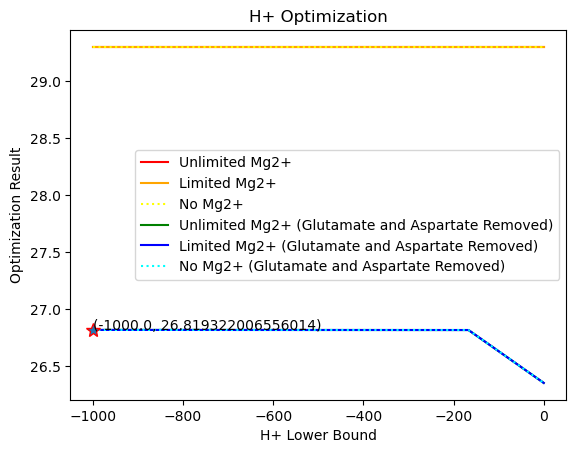

In [81]:
# Plotting Magnesium based on H+ value
# x axis = H+ concenration
# y asix = optimization result
# 3 lines, one unlimited Mg2+, one limited Mg2+, one none

# resetting all values
for ex_id in met_ex:
    model.exchanges.get_by_id(ex_id).lower_bound = -1000
    print(model.exchanges.get_by_id(ex_id).id, model.exchanges.get_by_id(ex_id).name)

# x axis values
x = np.linspace(-1000, 0, 1001)

# corresponding y axis values
y_unlimited_mg2 = []
y_limited_mg2 = []
y_no_mg2 = []
y_unlimited_mg2_removed = []
y_limited_mg2_removed = []
y_no_mg2_removed = []

# For comparing, for labeling point of decresing on graph
point_not_found = True
# Taking out glutamate and aspartate 
model.exchanges.get_by_id('EX_glu__L_e').lower_bound = 0
model.exchanges.get_by_id('EX_asp__L_e').lower_bound = 0
solution = model.optimize()
base_solution_removed = solution.objective_value
#Resetting glutamate and aspartate
model.exchanges.get_by_id('EX_glu__L_e').lower_bound = -1000
model.exchanges.get_by_id('EX_asp__L_e').lower_bound = -1000

for xVar in x:        
    # finds y_val from x for Unlimited Mg2+
    model.exchanges.get_by_id('EX_mg2_e').lower_bound = -1000 # Unlimitted
    model.exchanges.get_by_id('EX_h_e').lower_bound = xVar 
    solution = model.optimize()
    y_unlimited_mg2.append(solution.objective_value)  
    # Taking out glutamate and aspartate 
    model.exchanges.get_by_id('EX_glu__L_e').lower_bound = 0
    model.exchanges.get_by_id('EX_asp__L_e').lower_bound = 0
    model.exchanges.get_by_id('EX_h_e').lower_bound = xVar 
    solution = model.optimize()
    y_unlimited_mg2_removed.append(solution.objective_value)
    # labeling point in graph where decreasing begins
    # if (solution.objective_value != base_solution_removed and point_not_found):
    if (solution.objective_value < 26.842 and point_not_found):
        point_not_found = False # stops this from happening every loop
        x_removed_point = xVar
        y_removed_point = solution.objective_value
    #Resetting glutamate and aspartate
    model.exchanges.get_by_id('EX_glu__L_e').lower_bound = -1000
    model.exchanges.get_by_id('EX_asp__L_e').lower_bound = -1000
        
    #limits Mg2+ 
    model.exchanges.get_by_id('EX_mg2_e').lower_bound = -5 # Limited
    model.exchanges.get_by_id('EX_h_e').lower_bound = xVar 
    solution = model.optimize()
    y_limited_mg2.append(solution.objective_value)
    # Taking out glutamate and aspartate 
    model.exchanges.get_by_id('EX_glu__L_e').lower_bound = 0
    model.exchanges.get_by_id('EX_asp__L_e').lower_bound = 0
    model.exchanges.get_by_id('EX_h_e').lower_bound = xVar 
    solution = model.optimize()
    y_limited_mg2_removed.append(solution.objective_value) 
    #Resetting glutamate and aspartate
    model.exchanges.get_by_id('EX_glu__L_e').lower_bound = -1000
    model.exchanges.get_by_id('EX_asp__L_e').lower_bound = -1000
    
    # No Mg2+
    model.exchanges.get_by_id('EX_mg2_e').lower_bound = 0 # Limited
    model.exchanges.get_by_id('EX_h_e').lower_bound = xVar 
    solution = model.optimize()
    y_no_mg2.append(solution.objective_value)
    # Taking out glutamate and aspartate 
    model.exchanges.get_by_id('EX_glu__L_e').lower_bound = 0
    model.exchanges.get_by_id('EX_asp__L_e').lower_bound = 0
    model.exchanges.get_by_id('EX_h_e').lower_bound = xVar 
    solution = model.optimize()
    y_no_mg2_removed.append(solution.objective_value) 
    #Resetting glutamate and aspartate
    model.exchanges.get_by_id('EX_glu__L_e').lower_bound = -1000
    model.exchanges.get_by_id('EX_asp__L_e').lower_bound = -1000
    
# plotting
plt.plot(x, y_unlimited_mg2, color='red')
plt.plot(x, y_limited_mg2, color='orange', linestyle='-')
plt.plot(x,y_no_mg2, color='yellow', linestyle=':')
plt.plot(x, y_unlimited_mg2_removed, color='green')
plt.plot(x, y_limited_mg2_removed, color='blue', linestyle='-')
plt.plot(x,y_no_mg2_removed, color='cyan', linestyle=':')
plt.plot(x_removed_point, y_removed_point, marker='*', markersize=10, markeredgecolor="red")
point_text = '(' + str(x_removed_point) + ', ' + str(y_removed_point) + ')'
plt.text(x_removed_point,y_removed_point, point_text) # label of point

# naming the x axis
plt.xlabel('H+ Lower Bound')
# naming the y axis
plt.ylabel('Optimization Result')
# Legend
plt.legend(['Unlimited Mg2+', 'Limited Mg2+', 'No Mg2+', 'Unlimited Mg2+ (Glutamate and Aspartate Removed)', 
            'Limited Mg2+ (Glutamate and Aspartate Removed)', 'No Mg2+ (Glutamate and Aspartate Removed)'])

# giving a title to my graph
plt.title('H+ Optimization')
  
# function to show the plot
plt.show()

In [28]:
# set oxygen exchange lower bound to 0
model.exchanges.get_by_id('EX_o2_e').lower_bound = 0
solution = model.optimize()
print(solution.objective_value);

2.5824861842456385e-13


In [29]:
# import oxygen
model.exchanges.get_by_id('EX_o2_e').lower_bound = -10
solution = model.optimize()
print(solution.objective_value);

18.74946544147408


In [30]:
# set oxygen exchange back
model.exchanges.get_by_id('EX_o2_e').lower_bound = -1000
model.exchanges.get_by_id('EX_o2_e').upper_bound = 1000

In [31]:
# import hydrogen
model.exchanges.get_by_id('EX_h_e').lower_bound = -10
solution = model.optimize()
print(solution.objective_value);

29.526931979784003


In [32]:
# remove hydrogen import
model.exchanges.get_by_id('EX_h_e').lower_bound = 0
solution = model.optimize()
print(solution.objective_value);

29.526931979790056


In [33]:
# set hydrogen exchange back
model.exchanges.get_by_id('EX_h_e').lower_bound = -1000
model.exchanges.get_by_id('EX_h_e').upper_bound = 1000

In [34]:
# import ammonia
model.exchanges.get_by_id('EX_nh4_e').lower_bound = -10
solution = model.optimize()
print(solution.objective_value);

29.526931979790056


In [35]:
# remove ammonia import
model.exchanges.get_by_id('EX_nh4_e').lower_bound = 0
solution = model.optimize()
print(solution.objective_value);

29.526931979790056


### Gene Knockout of pcaA
In this section, we will focus on the importance (or lack thereof) of the pcaA gene regarding *M. tuberculosis* growth.

In [36]:
# reset the environment

# export all metabolites, import no metabolites
for ex in model.exchanges:
    ex.lower_bond = 0
    ex.upper_bound = 1000
    
# sheep blood agar
met_ex = ['EX_ala_B_e','EX_ala__D_e','EX_ala__L_e', 'EX_asn__L_e','EX_asp__L_e','EX_ca2_e','EX_cl_e','EX_fe2_e','EX_fe3_e',
          'EX_gal_e','EX_gln__L_e','EX_glu__L_e','EX_gly_e','EX_h_e','EX_h2o_e','EX_his__L_e','EX_ile__L_e','EX_k_e',
          'EX_leu__L_e','EX_lys__L_e','EX_met__L_e','EX_mg2_e','EX_na1_e','EX_nh4_e','EX_o2_e','EX_phe__L_e','EX_pi_e',
          'EX_ser__D_e','EX_ser__L_e','EX_so4_e','EX_thr__L_e','EX_tyr__L_e','EX_val__L_e']
for ex_id in met_ex:
    model.exchanges.get_by_id(ex_id).lower_bound = -1000

In [37]:
# remove the pcaA gene
with model:
    model.genes.get_by_id('Rv0470c').knock_out()
    solution = model.optimize()
    print('Biomass Flux with pcaA KO:', solution.objective_value)

Biomass Flux with pcaA KO: -1.4148495527471449e-12
